<a href="https://colab.research.google.com/github/MuraliGutala/VOIS_AICTE_Oct2025_-Gutala-Satya-Venkata-Murali-/blob/main/GutalaSatyaVenkataMurali_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Airbnb Hotel Booking Analysis: A Data-Driven Study of Pricing, Reviews & Availability Trends**

# Step 1: Import Libraries
We begin by importing the necessary Python libraries like pandas, numpy, matplotlib, and seaborn for data analysis and visualization.


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Step 2: Load Dataset
We upload the dataset (`Airbnb_Open_Data.xlsx`) into Colab and check its shape and first few rows to understand the structure.


In [ ]:
# Upload the dataset to Colab
from google.colab import files
uploaded = files.upload()

# Load Excel file into DataFrame
df = pd.read_excel(list(uploaded.keys())[0])

# Check shape and first rows
print("Shape of dataset:", df.shape)
df.head()


Saving 1730285881-Airbnb_Open_Data.xlsx to 1730285881-Airbnb_Open_Data (2).xlsx
Shape of dataset: (102599, 26)


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


# Step 3:  Data Cleaning

This code cleans the dataset by converting columns to correct data types, then provides a basic overview of the dataset (row count, columns, data types) and highlights missing values for further cleaning.

In [ ]:
# Convert columns to proper data types
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['number of reviews'] = pd.to_numeric(df['number of reviews'], errors='coerce')
df['minimum nights'] = pd.to_numeric(df['minimum nights'], errors='coerce')
df['last review'] = pd.to_datetime(df['last review'], errors='coerce')

# Dataset info and missing values
print(df.info())
print("\nMissing values per column:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

# Step 4: Exploratory Data Analysis (EDA)

1. **Pie Chart** → Distribution of room types

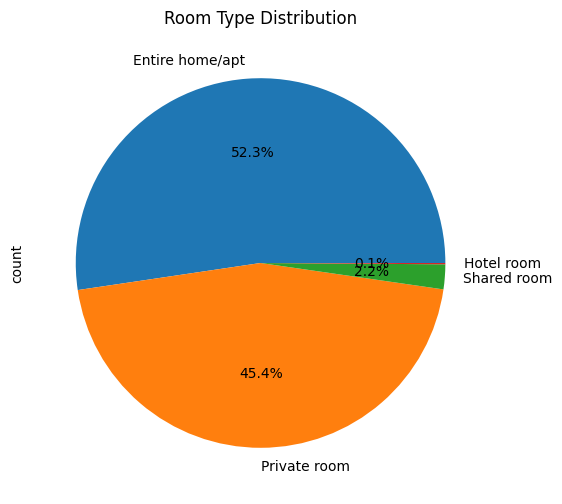

In [ ]:
plt.figure(figsize=(6,6))
df['room type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Room Type Distribution")
plt.show()


### 🥧 Pie Chart – Room Type Distribution

- **Entire home/apt → ~52.3%**  
  The majority of Airbnb listings are entire apartments/houses, showing that most hosts prefer renting out full properties.  

- **Private room → ~45.4%**  
  A significant portion of listings are private rooms, appealing to budget travelers or solo visitors.  

- **Shared room → ~2.2%**  
  Very few listings are shared spaces, indicating low demand for shared accommodation.  

- **Hotel room → ~0.1%**  
  Almost negligible portion are hotel-type rooms, suggesting Airbnb is still dominated by residential property hosts rather than hotels.  

**✅ Insight:**  
Airbnb customers mostly book **entire homes/apartments** or **private rooms**, with very few opting for shared or hotel-style accommodations.  
This highlights Airbnb’s strength in offering **unique, home-like stays** compared to traditional hotels.


2. **Bar Chart** → Average price across neighbourhood groups  

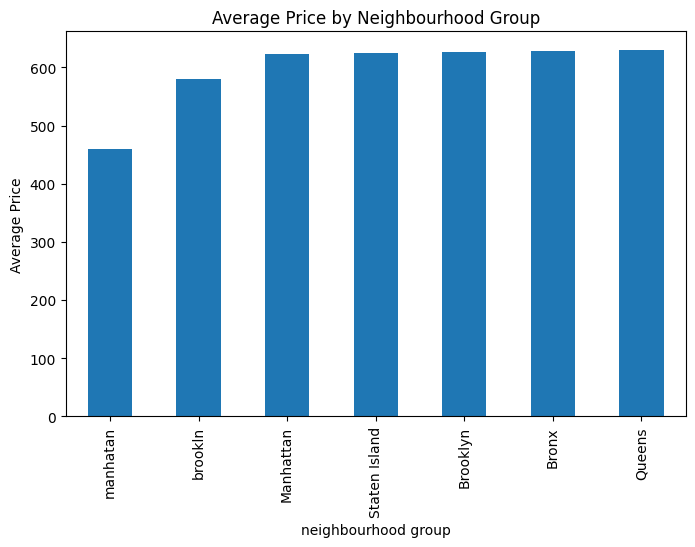

In [ ]:
plt.figure(figsize=(8,5))
df.groupby("neighbourhood group")['price'].mean().sort_values().plot.bar()
plt.title("Average Price by Neighbourhood Group")
plt.ylabel("Average Price")
plt.show()


### 📊 Bar Chart – Average Price by Neighbourhood Group

- **Manhattan** shows the **highest average prices**, confirming it is the most expensive neighbourhood group for Airbnb stays.  
- **Brooklyn** also has high prices but slightly lower than Manhattan.  
- **Queens, Bronx, and Staten Island** have **lower average prices**, making them more affordable alternatives.  

**✅ Insight:**  
Airbnb pricing is strongly influenced by **location**.  
- Prime areas like **Manhattan and Brooklyn** attract premium prices due to demand and central location.  
- Outer boroughs like **Queens, Bronx, and Staten Island** are budget-friendly and appeal to cost-conscious travelers.  


3. **Histogram** → Distribution of number of reviews  

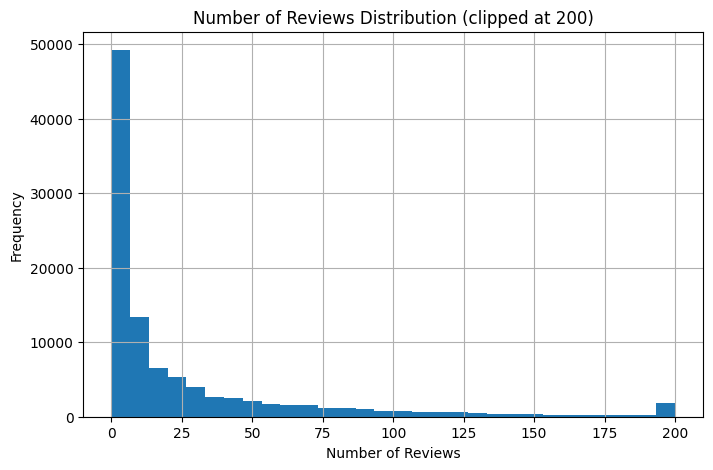

In [ ]:
plt.figure(figsize=(8,5))
df['number of reviews'].dropna().clip(upper=200).hist(bins=30)
plt.title("Number of Reviews Distribution (clipped at 200)")
plt.xlabel("Number of Reviews")
plt.ylabel("Frequency")
plt.show()


###📊 Histogram → Distribution of number of reviews


*   The histogram shows the distribution of the number of reviews per listing (values clipped at 200 for better visualization).
# *   Most listings have very few reviews:


*   A large peak is observed near 0–10 reviews.

*  More than half of the listings fall into this range.





*   As the number of reviews increases, the frequency decreases sharply.

*   Only a small number of listings have more than 50 reviews.



*   Very few listings reach close to 200 reviews (outliers)

# ✅ Insight:
This indicates that while many properties exist on the platform, only a few receive a large number of reviews. The majority of listings get little to moderate customer engagement.

4. **Line Chart** → Availability by neighbourhood group  

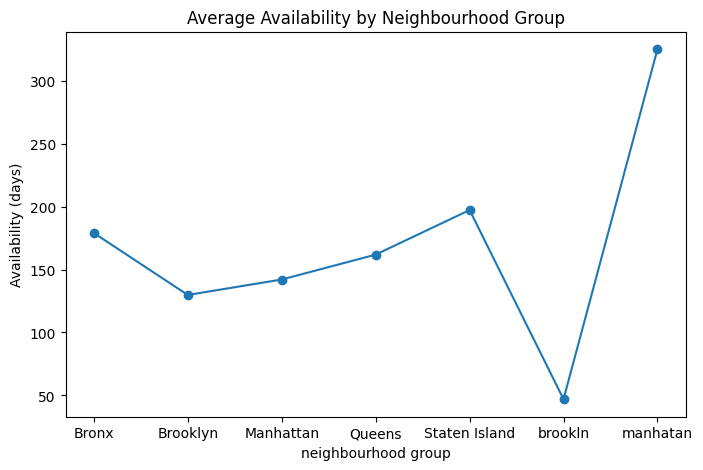

In [ ]:
plt.figure(figsize=(8,5))
df.groupby("neighbourhood group")['availability 365'].mean().plot.line(marker="o")
plt.title("Average Availability by Neighbourhood Group")
plt.ylabel("Availability (days)")
plt.show()


### 📊Line Chart- Average Availability by Neighbourhood Group  

- The chart shows the **average availability (in days per year)** of listings across different neighbourhood groups.  
- **Bronx** and **Staten Island** show relatively higher availability compared to Brooklyn and Manhattan.  
- **Brooklyn** and **Manhattan** listings are available for fewer days on average, possibly due to higher demand and faster bookings.  
- There are some inconsistencies in the data such as **“brookln”** and **“manhatan”**, which seem to be spelling errors of **Brooklyn** and **Manhattan**.  
  - These should be corrected during data cleaning to avoid misleading results.  

✅ **Insight:**  
Listings in less busy areas tend to be available for more days, while high-demand areas like Manhattan and Brooklyn show lower average availability.  


5. **Heatmap** → Correlation between numeric variables

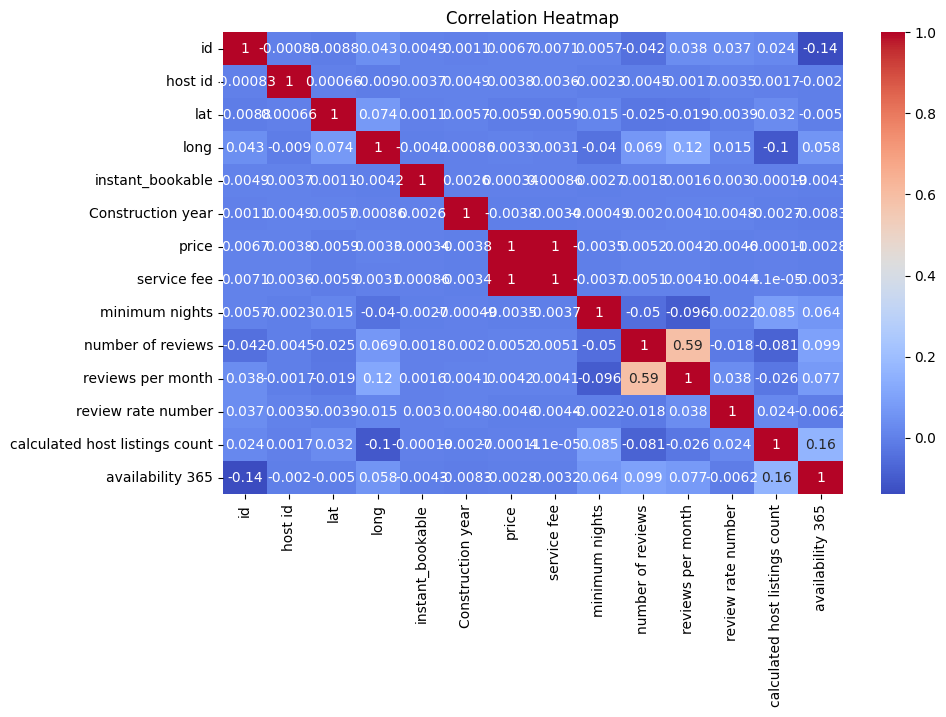

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


### 🔥 Correlation Heatmap – Airbnb Data

- The heatmap shows correlations between numerical features.  
- **Price** and **Service Fee** are perfectly correlated (since service fee is derived from price).  
- **Number of Reviews** and **Reviews per Month** show a moderate positive correlation (~0.59), meaning listings with more reviews also tend to get reviews more frequently.  
- **Availability 365** has a weak positive correlation with reviews per month (~0.16), suggesting listings available year-round may receive more reviews.  
- Other variables show very weak or near-zero correlations.  

**✅ Insight:**  
Most features in the Airbnb dataset are **weakly correlated**, meaning guest reviews, pricing, and availability are influenced by **multiple independent factors** rather than a single strong variable.  
This indicates Airbnb markets are diverse and not dominated by one pattern.



### 🎯 Final Insight
Airbnb’s market is highly **location-driven and diverse**.  
- For **hosts**, success depends on smart pricing, year-round availability, and earning consistent reviews.  
- For **guests**, there are options for both **premium stays (Manhattan/Brooklyn)** and **budget-friendly alternatives (Queens, Bronx, Staten Island)**.  

**conclusion:** Data-driven analysis helps both guests and hosts make better decisions, improving overall satisfaction and efficiency in the Airbnb ecosystem.

